# EM Peak Temperature comparisons

In [8]:
import copy
import sys
import glob

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import astropy.units as u
from astropy.visualization import ImageNormalize, LogStretch
from astropy.coordinates import SkyCoord
import sunpy.map

from synthesizAR.analysis.dem import EMCube

sys.path.append('../paper/python/')
import utils
import colormaps
from classify import prep_data, classify_ar

%matplotlib inline

In [2]:
em_low = EMCube.restore('../paper/data/low_frequency/em_cube.h5')
em_intermediate = EMCube.restore('../paper/data/intermediate_frequency/em_cube.h5')
em_high = EMCube.restore('../paper/data/high_frequency/em_cube.h5')
em_obs = EMCube.restore('../paper/data/observations/em_cube.h5')

In [3]:
def make_peak_temperature_map(cube, threshold):
    tmax = cube.temperature_bin_centers[np.argmax(cube.as_array(), axis=2)]
    mask = u.Quantity(cube.total_emission.data, cube.total_emission.meta['bunit']) < threshold
    meta = copy.deepcopy(cube.all_meta()[0])
    del meta['temp_unit']
    del meta['temp_a']
    del meta['temp_b']
    meta['bunit'] = 'K'
    return sunpy.map.Map(tmax/1e6, meta, mask=mask)

In [35]:
tmax_obs = make_peak_temperature_map(em_obs, 2e27*u.cm**(-5))

In [36]:
em_tot = em_obs.total_emission

In [37]:
blc = (-410*u.arcsec,-325*u.arcsec)
trc = (-225*u.arcsec,-150*u.arcsec)

In [38]:
tmax_obs_crop = tmax_obs.submap(SkyCoord(*blc, frame=tmax_obs.coordinate_frame),
                                SkyCoord(*trc, frame=tmax_obs.coordinate_frame))

In [39]:
em_tot_crop = em_tot.submap(SkyCoord(*blc, frame=em_tot.coordinate_frame),
                            SkyCoord(*trc, frame=em_tot.coordinate_frame))

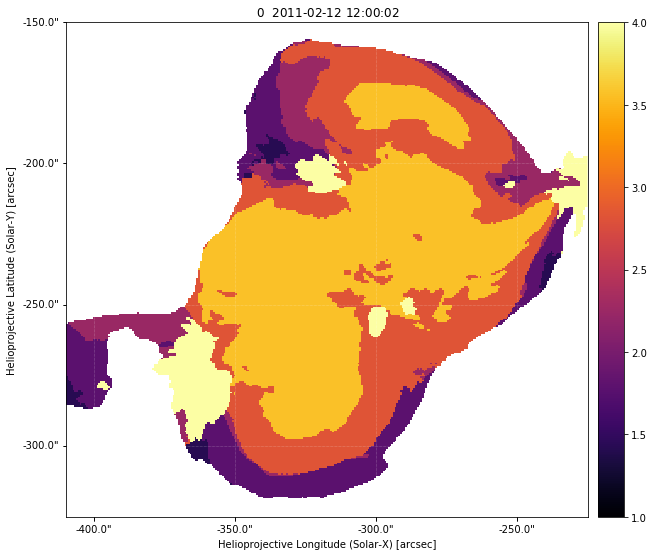

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection=tmax_obs_crop)
im = tmax_obs_crop.plot(axes=ax, cmap='inferno', vmin=1, vmax=4)
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("right", size="5%", pad="2%", axes_class=matplotlib.axes.Axes)
cb = fig.colorbar(im, cax=cax)

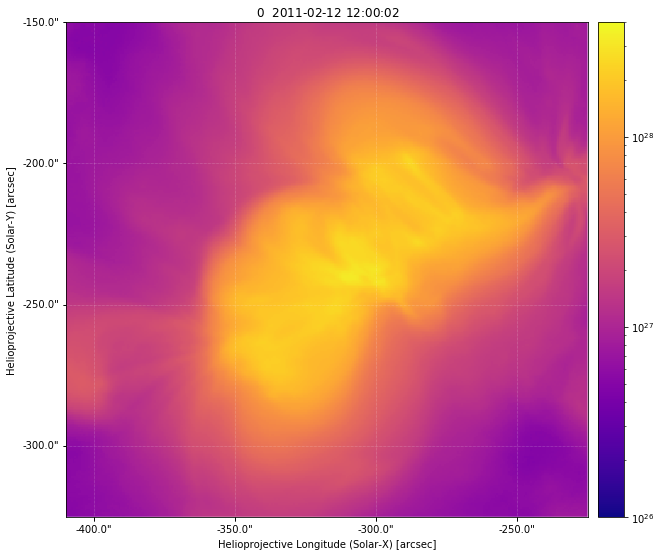

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection=em_tot_crop)
im = em_tot_crop.plot(axes=ax, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1e26,vmax=4e28))
ax_divider = make_axes_locatable(ax)
cax = ax_divider.append_axes("right", size="5%", pad="2%", axes_class=matplotlib.axes.Axes)
cb = fig.colorbar(im, cax=cax)

In [41]:
blc_model = (-405*u.arcsec, -335*u.arcsec)
trc_model = (-210*u.arcsec, -140*u.arcsec)

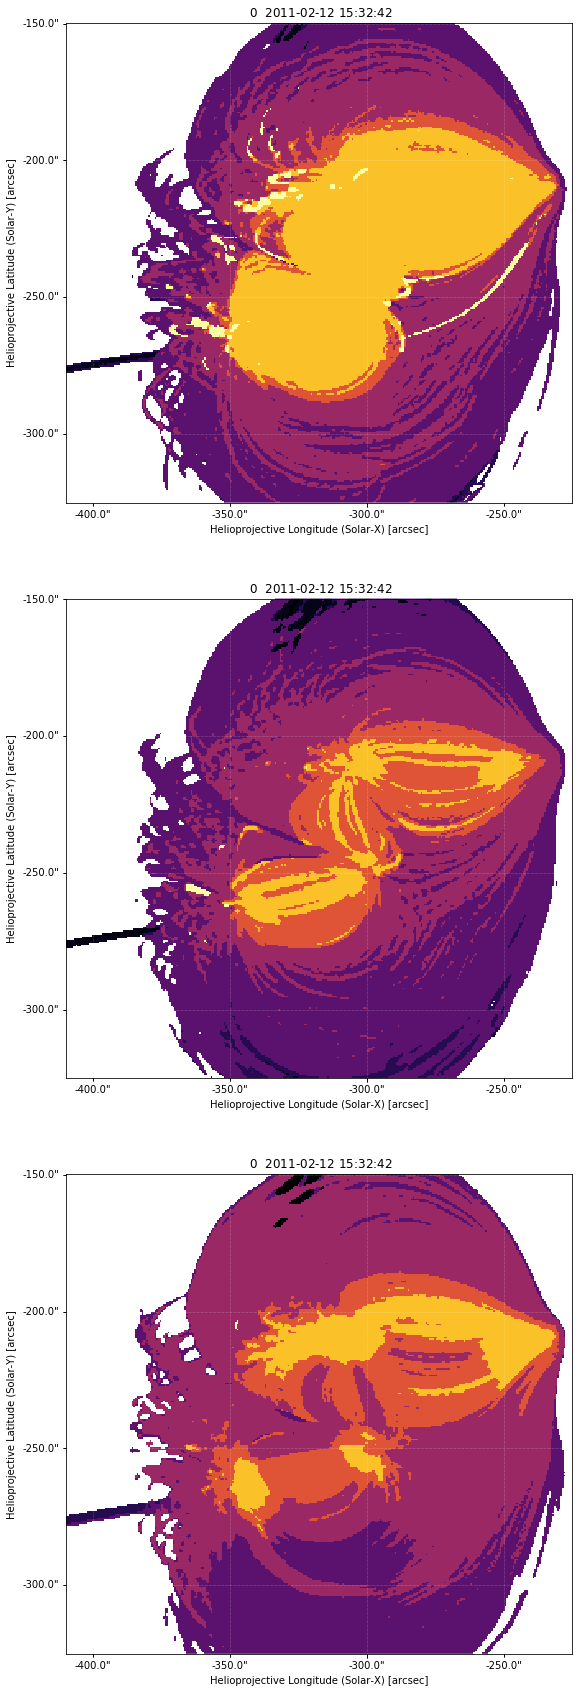

In [281]:
fig = plt.figure(figsize=(10,30))
for i, cube in enumerate([em_low, em_intermediate, em_high]):
    tmax_map = make_peak_temperature_map(cube, 1e24*u.cm**(-5))
    tmax_map = tmax_map.submap(SkyCoord(*blc, frame=tmax_map.coordinate_frame),
                               SkyCoord(*trc, frame=tmax_map.coordinate_frame))
    ax = fig.add_subplot(3,1,i+1, projection=tmax_map)
    tmax_map.plot(axes=ax, cmap='inferno', vmin=1, vmax=4)

In [45]:
tmax_map_model = [make_peak_temperature_map(c, 1e24*u.cm**(-5)) for c in [em_high, em_intermediate, em_low, em_obs]]

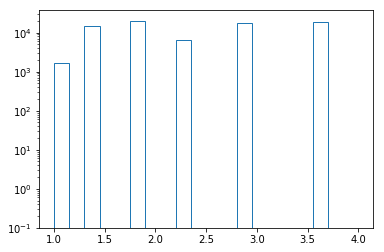

In [280]:
fig = plt.figure()
ax = fig.gca()
for tm in [tmax_obs]:
    data = tm.data[~tm.mask].flatten()
    ax.hist(data, density=False, range=(1,4), bins=20, histtype='step', log=True)

In [58]:
m94 = sunpy.map.Map('../paper/data/observations/aia_lev1.5_20110212T153238_94_cutout.fits')
m94 = m94.submap(SkyCoord(Tx=-440*u.arcsec,Ty=-380*u.arcsec,frame=m94.coordinate_frame),
                 SkyCoord(Tx=-185*u.arcsec,Ty=-125*u.arcsec,frame=m94.coordinate_frame))

In [63]:
m171 = sunpy.map.Map('../paper/data/observations/aia_lev1.5_20110212T153248_171_cutout.fits')
m171 = m171.submap(SkyCoord(Tx=-440*u.arcsec,Ty=-380*u.arcsec,frame=m171.coordinate_frame),
                   SkyCoord(Tx=-185*u.arcsec,Ty=-125*u.arcsec,frame=m171.coordinate_frame))

Text(-0.09722222222222222, -0.05, 'P')

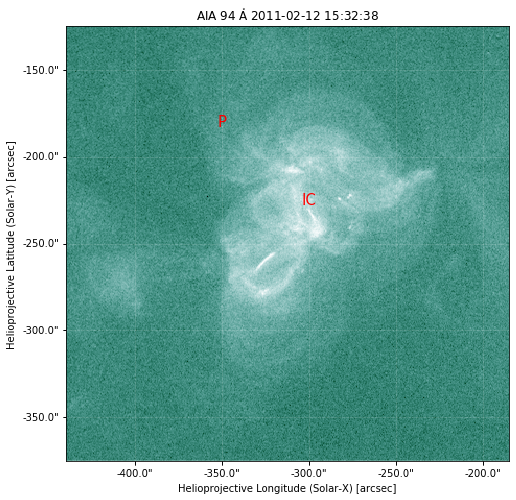

In [71]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection=m94)
m94.plot(axes=ax)
ax.text((-300*u.arcsec).to(u.deg).value,
        (-225*u.arcsec).to(u.deg).value,
        'IC',
        transform=ax.get_transform('world'),
        color='r',
        verticalalignment='center',
        horizontalalignment='center',
        fontsize=15)
ax.text((-350*u.arcsec).to(u.deg).value,
        (-180*u.arcsec).to(u.deg).value,
        'P',
        transform=ax.get_transform('world'),
        color='r',
        verticalalignment='center',
        horizontalalignment='center',
        fontsize=15)

Text(-0.09027777777777778, -0.08888888888888889, 'P')

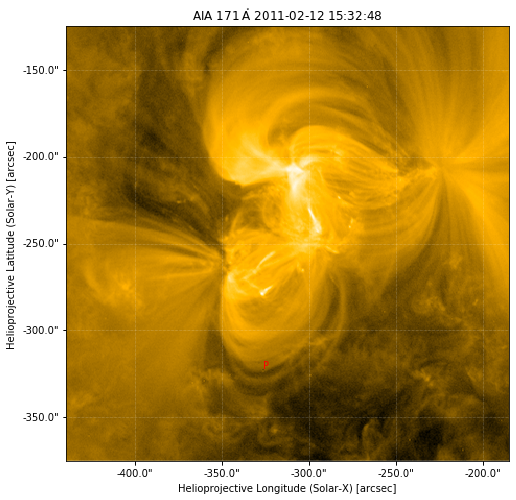

In [66]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection=m171)
m171.plot(axes=ax)
ax.text((-325*u.arcsec).to(u.deg).value,
        (-320*u.arcsec).to(u.deg).value,
        'P',
        transform=ax.get_transform('world'),
        color='r',
        verticalalignment='center',
        horizontalalignment='center')

In [111]:
m211193_cc = sunpy.map.Map('../paper/data/observations/correlation_211_193.fits')
m211193_tl = sunpy.map.Map('../paper/data/observations/timelag_211_193.fits')
m171131_tl = sunpy.map.Map('../paper/data/observations/timelag_171_131.fits')
m211193_tl = sunpy.map.Map(m211193_tl.data, m211193_tl.meta, mask=m211193_cc.data<0.1)

/Users/willbarnes/anaconda/envs/synthetic-observables/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


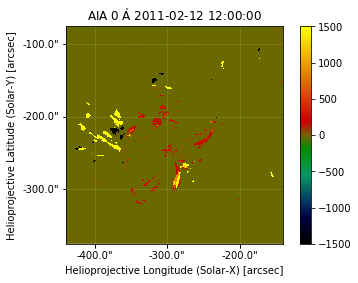

In [128]:
m211193_tl.peek(cmap='idl_bgry_004', vmin=-1500,vmax=1500)

/Users/willbarnes/anaconda/envs/synthetic-observables/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


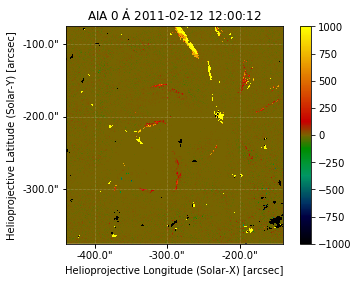

In [126]:
m171131_tl.peek(cmap='idl_bgry_004', vmin=-1000,vmax=1000)

In [84]:
m211193.plot_settings

{'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x113715d68>,
 'norm': <matplotlib.colors.Normalize at 0x1c2310da58>,
 'interpolation': 'nearest',
 'origin': 'lower'}

/Users/willbarnes/anaconda/envs/synthetic-observables/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


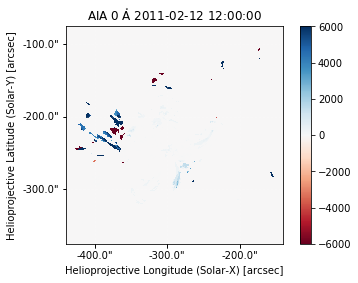

In [88]:
m211193_tl.peek(cmap='RdBu', vmin=-6e3, vmax=6e3)

In [354]:
tl_maps[5].plot_settings

{'cmap': <matplotlib.colors.LinearSegmentedColormap at 0x113715d68>,
 'norm': <matplotlib.colors.Normalize at 0x1c31c09f98>,
 'interpolation': 'nearest',
 'origin': 'lower'}

/Users/willbarnes/anaconda/envs/synthetic-observables/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


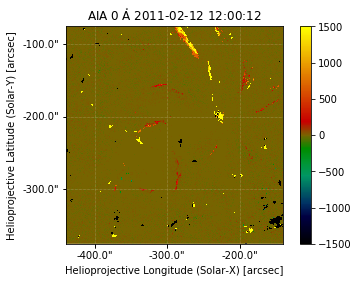

In [358]:
tl_maps[0].peek(cmap='idl_bgry_004', norm=ImageNormalize(vmin=-1500,vmax=1500))

In [345]:
cc_maps[5].data[np.where(cc_maps[5].data > 0.1)]

array([0.75869721, 0.74501717, 0.73679375, ..., 0.52796353, 0.53801664,
       0.52612889])

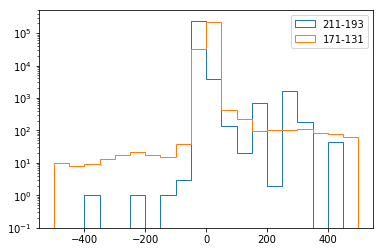

In [364]:
_,bins,_ = plt.hist(tl_maps[5].data[np.where(cc_maps[5].data > 0.1)],
                    range=[-500,500],
                    bins=20,
                    log=True,
                    histtype='step',
                    label='211-193');
plt.hist(tl_maps[0].data[np.where(cc_maps[0].data > 0.1)],bins=bins,log=True,histtype='step',label='171-131');
plt.legend()

In [110]:
bins

array([-500., -450., -400., -350., -300., -250., -200., -150., -100.,
        -50.,    0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,
        400.,  450.,  500.])

In [108]:
h[4]

240381.0

In [187]:
cc_maps = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/observations/correlation*.fits'))]
tl_maps = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/observations/timelag*.fits'))]
intensity_maps = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/observations/aia_lev1.5*_cutout.fits'))]

In [236]:
cc_maps_high = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/high_frequency/correlation*.fits'))]
cc_maps_intermediate = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/intermediate_frequency/correlation*.fits'))]
cc_maps_low = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/low_frequency/correlation*.fits'))]

In [328]:
tl_maps_high = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/high_frequency/timelag*.fits'))]
tl_maps_intermediate = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/intermediate_frequency/timelag*.fits'))]
tl_maps_low = [sunpy.map.Map(f) for f in sorted(glob.glob('../paper/data/low_frequency/timelag*.fits'))]

171-131
171-131
171-131
193-131
193-131
193-131
193-171
193-171
193-171
211-131
211-131
211-131
211-171
211-171
211-171
211-193
211-193
211-193
335-131
335-131
335-131
335-171
335-171
335-171
335-193
335-193
335-193
335-211
335-211
335-211
94-131
94-131
94-131
94-171
94-171
94-171
94-193
94-193
94-193
94-211
94-211
94-211
94-335
94-335
94-335


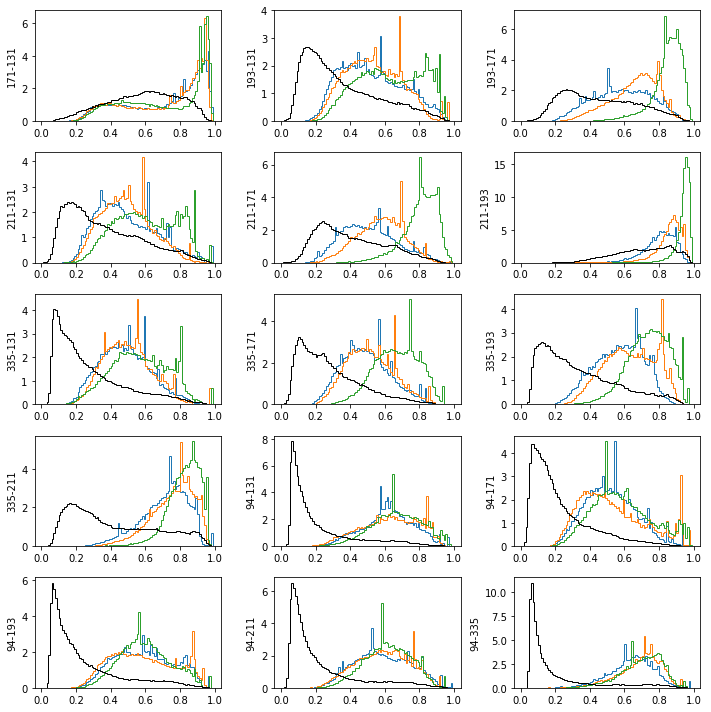

In [239]:
bins = np.arange(0.01,1,0.01)
fig = plt.figure(figsize=(10,10))
for i,m in enumerate(cc_maps):
    ax = fig.add_subplot(5, 3, i+1)
    for mc in [cc_maps_high[i], cc_maps_intermediate[i], cc_maps_low[i]]:
        ax.hist(mc.data.flatten(),bins=bins,histtype='step',density=True)
        print(mc.meta['comment'].split(' ')[0])
    ax.hist(m.data.flatten(),bins=bins,histtype='step',color='k',density=True)
    ax.set_ylabel(m.meta['comment'].split(' ')[0])
plt.tight_layout()

94-335 cross-correlation


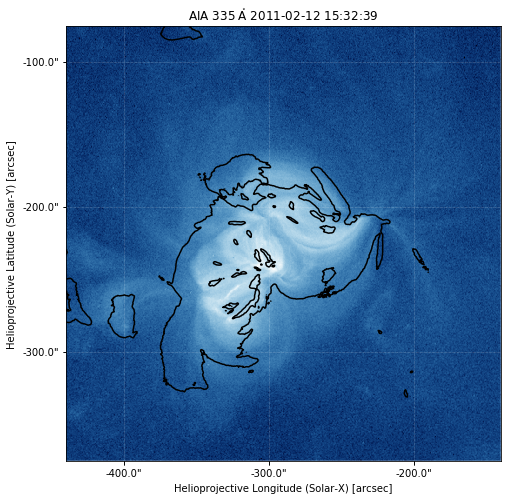

In [231]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection=intensity_maps[1])
plot_opts = {}#dict(vmin=-6e3,vmax=6e3,cmap='idl_bgry_004',)
intensity_maps[1].plot(**plot_opts, axes=ax)
cc_maps[-1].draw_contours([50,]*u.percent,cmap='Greys_r',axes=ax)
print(cc_maps[-1].meta['comment'])

In [282]:
foo = np.random.rand(100,100) > 0.5

In [287]:
np.where(foo==True)[0].shape[0]

5036

In [293]:
110619 / (3 * (cc_maps[0].dimensions.x * cc_maps[0].dimensions.y).value)

0.147492

In [295]:
X, Y, X_observation, bad_pixels = prep_data(
    '../paper/data',
    [
        (94,335),
        (94,211),
        (94,193),
        (94,171),
        (94,131),
        (335,211),
        (335,193),
        (335,171),
        (335,131),
        (211,193),
        (211,171),
        (211,131),
        (193,171),
        (193,131),
        (171,131),
    ],
    [
        'high_frequency',
        'intermediate_frequency',
        'low_frequency'
    ],
    correlation_threshold=0.1,
    rsquared_threshold=0.75,
)

../paper/python/utils.py:46: RuntimeWarning: invalid value encountered in log10
  em_valid = np.log10(emcube.as_array()[i_valid])


In [296]:
X.shape

(110619, 32)

/Users/willbarnes/anaconda/envs/synthetic-observables/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


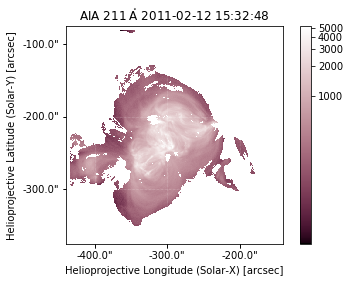

In [321]:
foo = sunpy.map.Map(intensity_maps[5].data,
                    intensity_maps[5].meta,
                    mask=bad_pixels)
foo.peek()

In [304]:
np.where(bad_pixels)[0].shape[0]

180204

In [322]:
tot_pix = ((cc_maps[0].dimensions.x * cc_maps[0].dimensions.y).value - np.where(~bad_pixels)[0].shape[0])

In [323]:
tot_pix

180204.0

In [324]:
1 - X.shape[0] / (3 * 500 * 500) 

0.852508

In [327]:
np.where(bad_pixels)[0].shape[0] / (intensity_maps[0].data.shape[0] * intensity_maps[0].data.shape[1])

0.720816

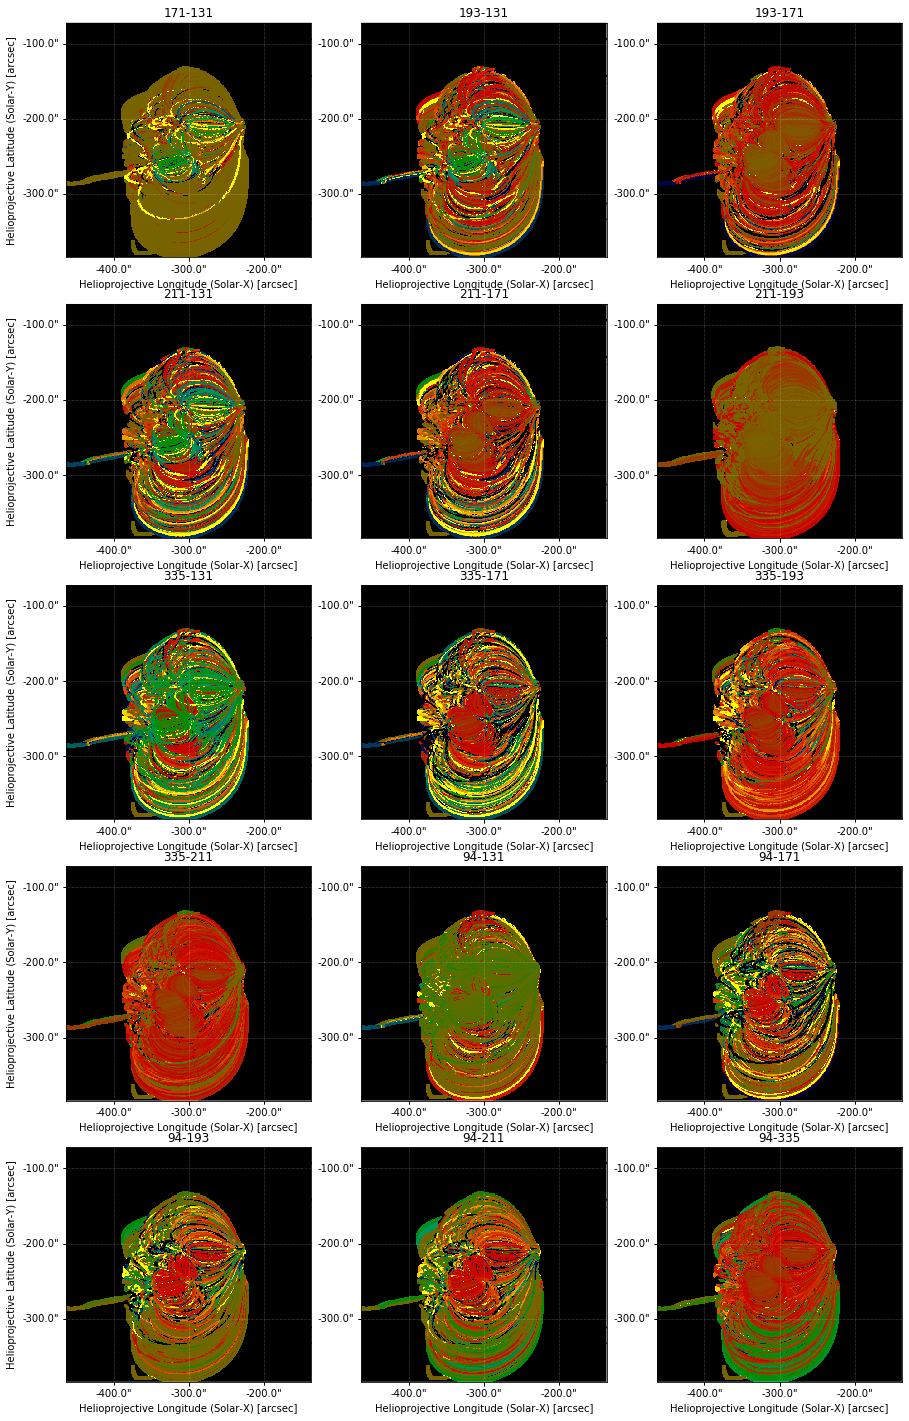

In [337]:
fig = plt.figure(figsize=(15,25))
for i,m in enumerate(tl_maps_high):
    ax = fig.add_subplot(5,3,i+1, projection=m)
    cp = m.meta['comment'].split(' ')[0]
    m.plot(axes=ax,cmap='idl_bgry_004', vmin=-6000,vmax=6000,title=cp)

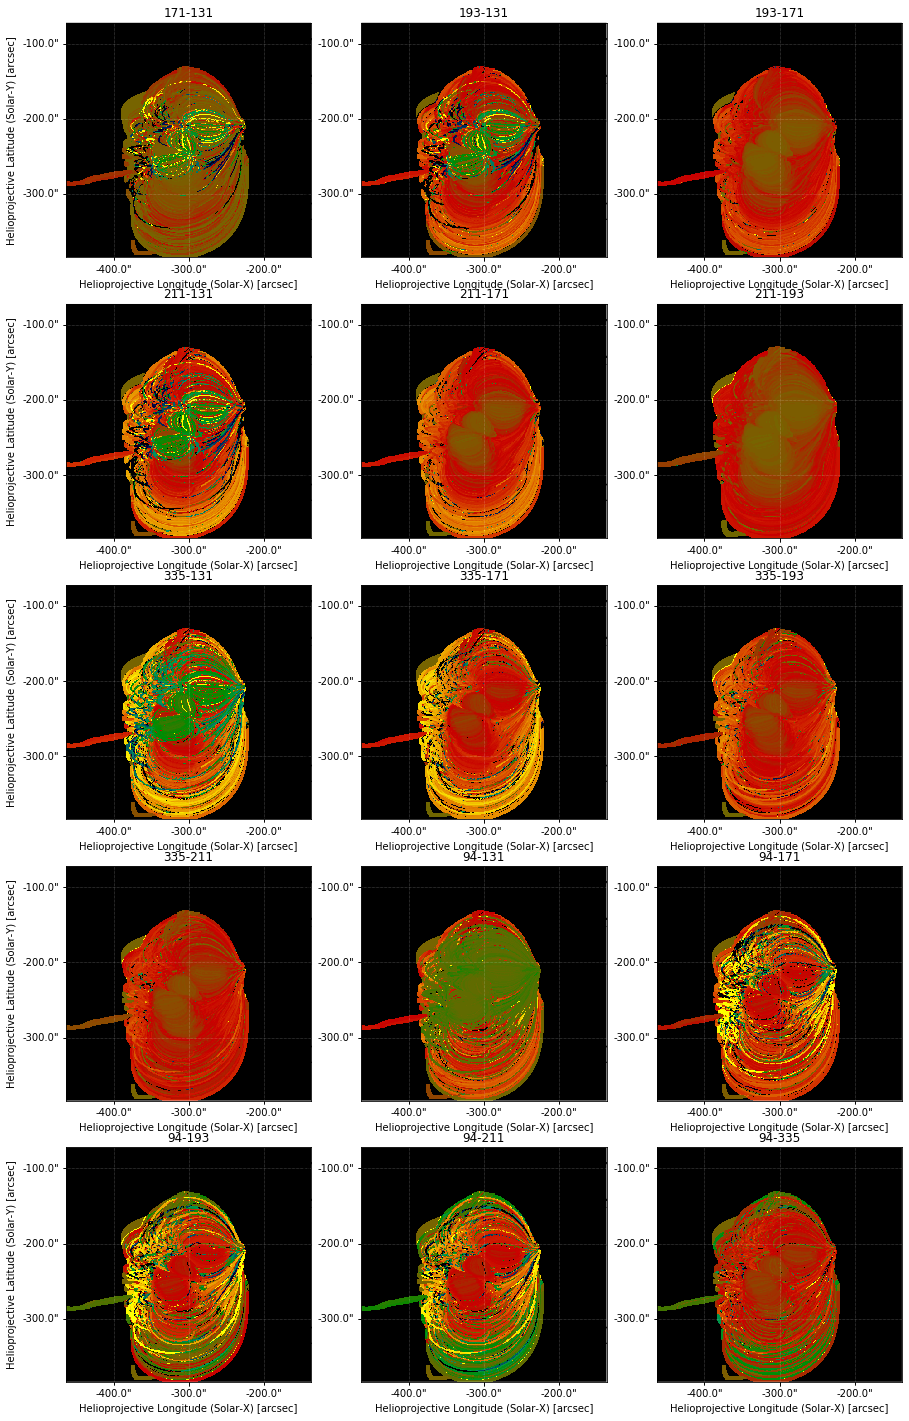

In [336]:
fig = plt.figure(figsize=(15,25))
for i,m in enumerate(tl_maps_low):
    ax = fig.add_subplot(5,3,i+1, projection=m)
    cp = m.meta['comment'].split(' ')[0]
    m.plot(axes=ax,cmap='idl_bgry_004', vmin=-6000,vmax=6000,title=cp)

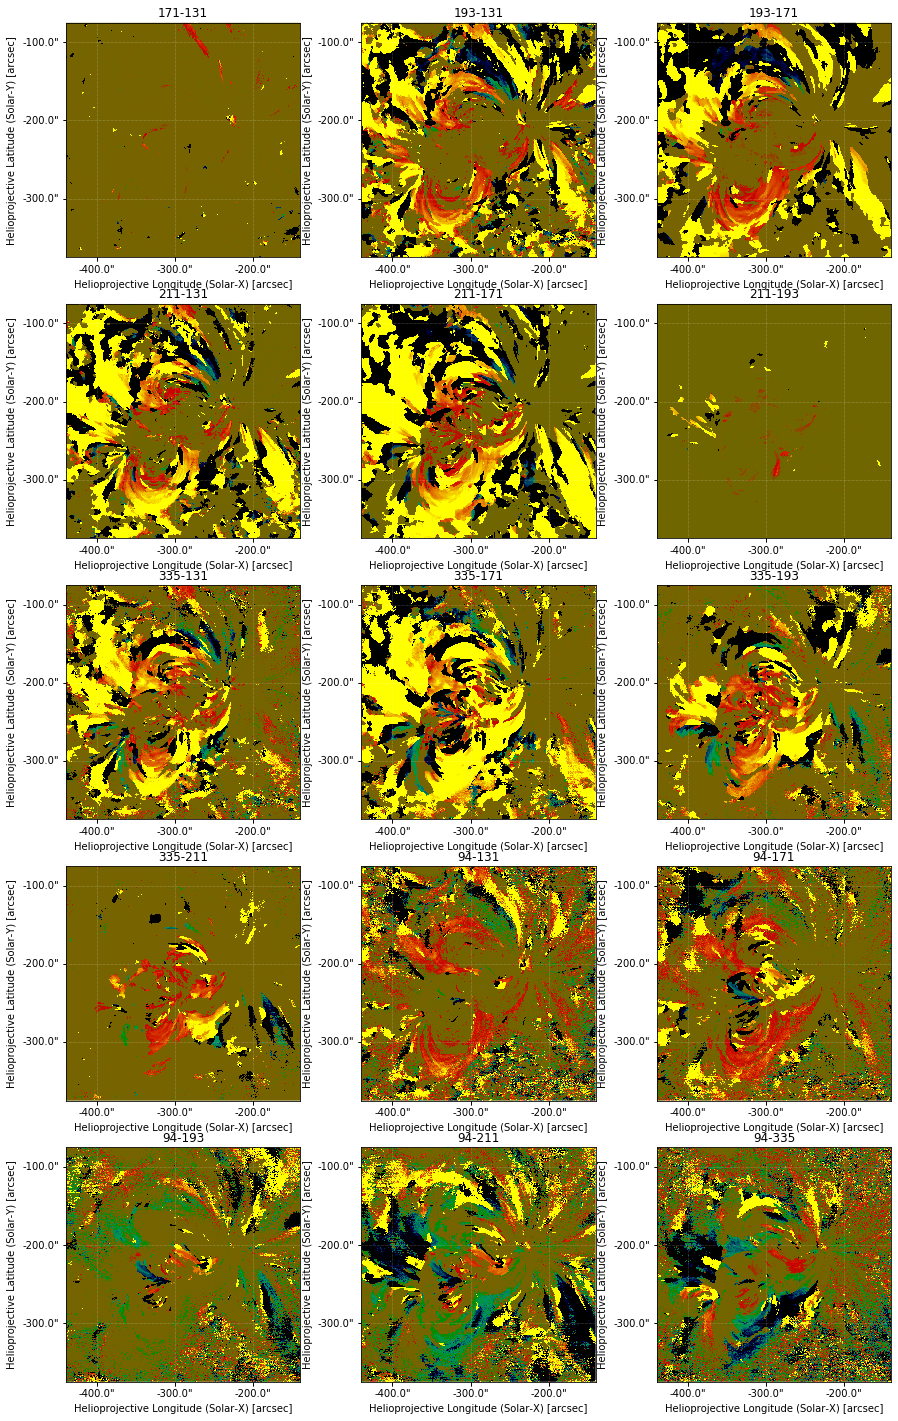

In [340]:
fig = plt.figure(figsize=(15,25))
for i,m in enumerate(tl_maps):
    ax = fig.add_subplot(5,3,i+1, projection=m)
    cp = m.meta['comment'].split(' ')[0]
    m.plot(axes=ax,cmap='idl_bgry_004', vmin=-6000,vmax=6000,title=cp)